In [1]:
import talos as ta

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\chances\plots.py:7: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  Fi

In [2]:
r = ta.Reporting('./hasil/7layer.csv')

In [3]:
# get the number of rounds in the Scan
r.rounds()

269

In [6]:
# get the highest result ('val_acc' by default)
r.high()

0.8481827190000001

In [7]:
# get the highest result for any metric
r.high('acc')

0.9780424129999999

In [8]:
# get the round with the best result
r.rounds2high('acc')

49

In [24]:
# get the best paramaters
r.best_params('acc')

array([['<keras.layers.advanced_activations.LeakyReLU object at 0x7f89289c4cc0>',
        25, 70, 30, 40, 49, 'lecun_uniform',
        "<class 'keras.optimizers.Adam'>", 20, 30, 0.001, 0, 256, 0],
       ['<function relu at 0x7fc2d0443730>', 25, 60, 30, 50, 213,
        'he_normal', "<class 'keras.optimizers.Adam'>", 20, 30, 0.0001,
        0, 32, 1],
       ['<function relu at 0x7f6701c02840>', 20, 60, 30, 50, 214,
        'lecun_uniform', "<class 'keras.optimizers.Adam'>", 20, 30,
        0.001, 0, 256, 2],
       ['<keras.layers.advanced_activations.LeakyReLU object at 0x7f89289c4cc0>',
        20, 60, 30, 40, 50, 'he_normal',
        "<class 'keras.optimizers.Adam'>", 20, 35, 0.001, 0, 64, 3],
       ['<keras.layers.advanced_activations.LeakyReLU object at 0x7efbf9389ba8>',
        25, 60, 30, 50, 51, 'glorot_normal',
        "<class 'keras.optimizers.Adam'>", 20, 35, 0.001, 0, 64, 4],
       ['<function relu at 0x7f1ade22cd08>', 25, 60, 30, 40, 215,
        'glorot_uniform', "<cla

In [10]:
# get correlation for hyperparameters against a metric
r.correlate('loss')

first_neuron     0.033673
second_neuron   -0.006333
third_neuron    -0.011981
fourth_neuron   -0.051304
batch_size      -0.236194
epochs                NaN
epochs2               NaN
dropout               NaN
lr               0.429958
Name: loss, dtype: float64

In [11]:
# get correlation for hyperparameters against a metric
r.correlate('acc')

first_neuron    -0.018359
second_neuron    0.002099
third_neuron     0.045137
fourth_neuron    0.120840
batch_size       0.231167
epochs                NaN
epochs2               NaN
dropout               NaN
lr              -0.492492
Name: acc, dtype: float64

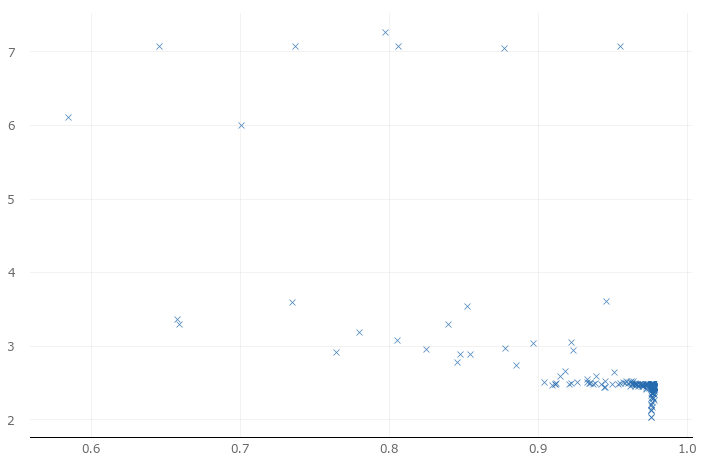

In [12]:
# a regression plot for two dimensions 
r.plot_regs('acc')

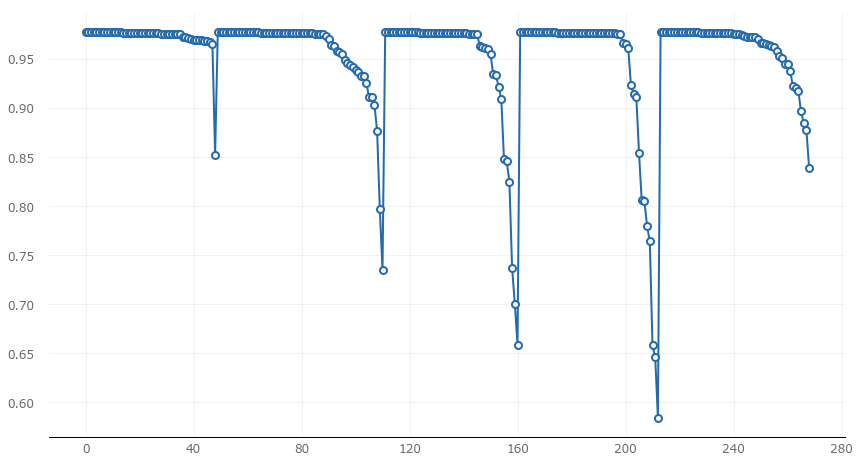

In [13]:
# line plot
r.plot_line('acc')

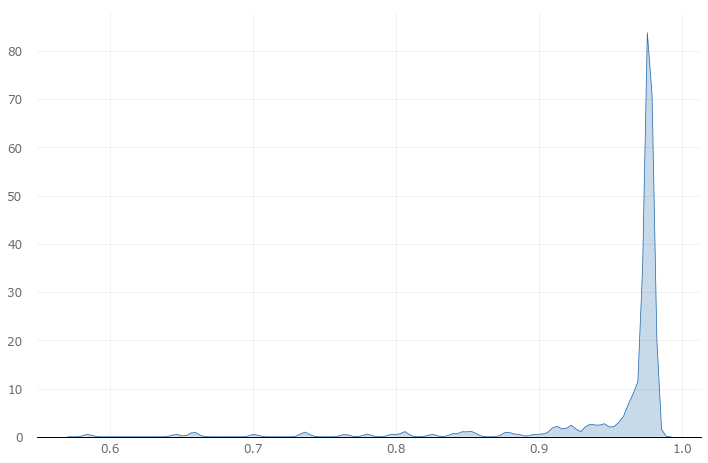

In [14]:
# up to two dimensional kernel density estimator
r.plot_kde('acc')

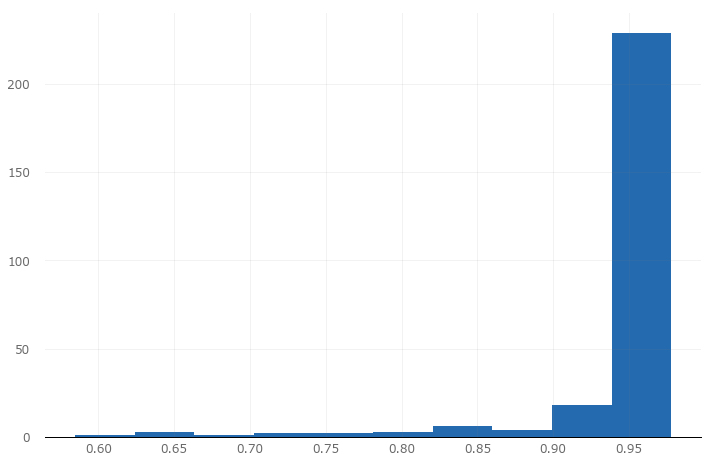

In [15]:

# a simple histogram
r.plot_hist('acc')

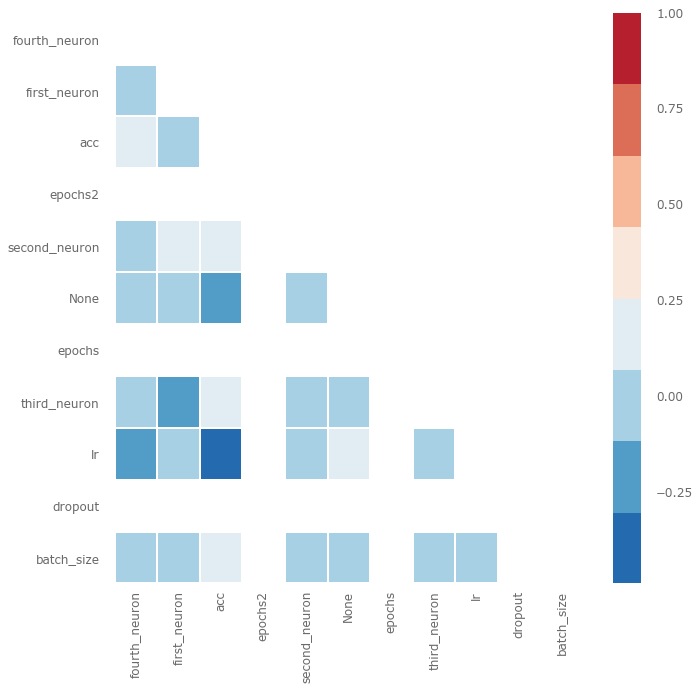

In [16]:
# heatmap correlation
r.plot_corr('acc')

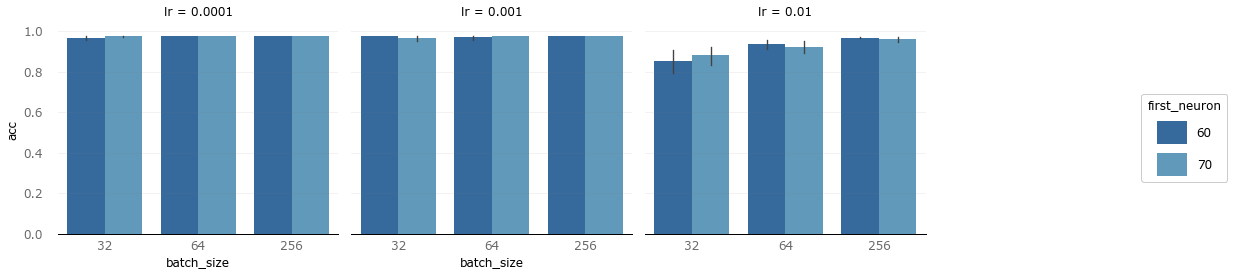

In [17]:
# a four dimensional bar grid
r.plot_bars('batch_size', 'acc', 'first_neuron', 'lr')


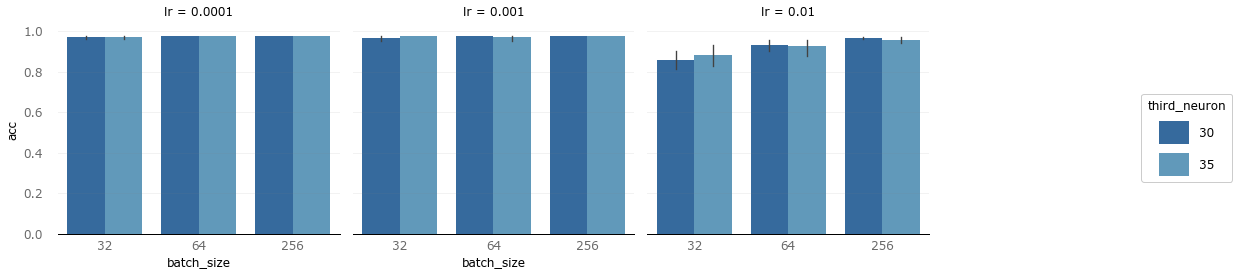

In [18]:
# a four dimensional bar grid
r.plot_bars('batch_size', 'acc', 'third_neuron', 'lr')

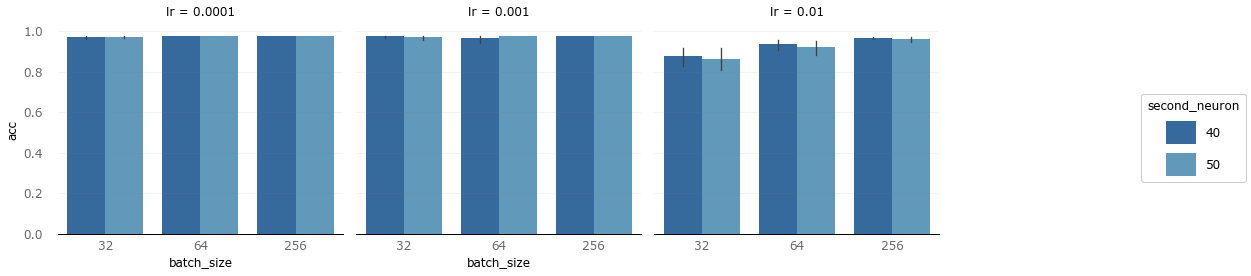

In [19]:
# a four dimensional bar grid
r.plot_bars('batch_size', 'acc', 'second_neuron', 'lr')

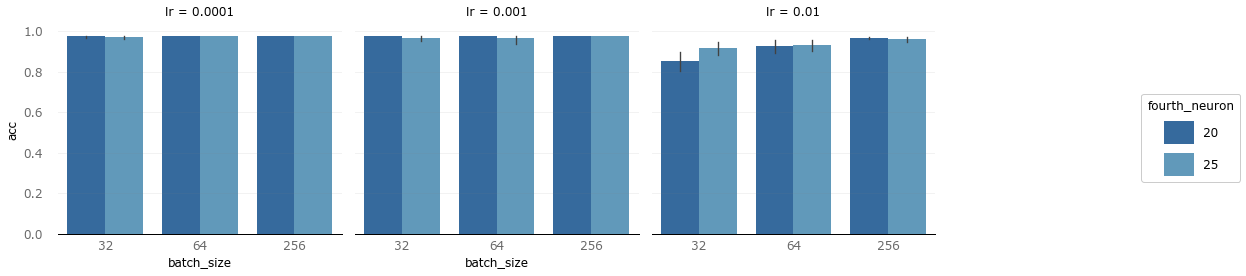

In [20]:
# a four dimensional bar grid
r.plot_bars('batch_size', 'acc', 'fourth_neuron', 'lr')

# Matrik Confusion

### Open Data

In [21]:
import numpy as np
def load_matrices(file_name):
    with open(file_name, 'rb') as f:
        A = np.load(f)
        B = np.load(f)
        C = np.load(f)
        D = np.load(f)
        E = np.load(f)
        F = np.load(f)
    return (A,B,C,D,E,F)

In [22]:
my_file =  '../CIDS-2018/10data2.npy'
train,test,y_train,y_test,ylabel_train, ylabel_test = load_matrices(my_file)

### Create Model

Karena pada best model fungsi aktivasi yang tersimpan sebagai 'lrelu', tidak dikenali pada saat load model maka model perludibuat secara manual. Bobot kemudian akan diload dari hasil terbaik. 


In [23]:
from keras.layers import Input,Dense
from keras.models import Model, Sequential
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.advanced_activations import PReLU
#actvation leakyrelu
LR= LeakyReLU(0.01)
LR.__name__ = 'lrelu'

In [25]:
# tcreate model
input_dim = train.shape[1]
print(input_dim)

input_img = Input(shape=(input_dim,))
encoded = Dense(70, activation=LR, kernel_initializer='lecun_uniform')(input_img)
encoded= Dense(40, activation=LR, kernel_initializer='lecun_uniform')(encoded)
encoded = Dense(30, activation=LR, kernel_initializer='lecun_uniform')(encoded)
encoded = Dense(25, activation=LR, kernel_initializer='lecun_uniform')(encoded)
decoded = Dense(30, activation=LR, kernel_initializer='lecun_uniform')(encoded)
decoded = Dense(40, activation=LR, kernel_initializer='lecun_uniform')(decoded)
decoded = Dense(70, activation=LR, kernel_initializer='lecun_uniform')(decoded)
z = Dense(input_dim, activation='sigmoid', kernel_initializer='lecun_uniform')(decoded)
autoencoder = Model(input_img, z)
autoencoder.summary()



num_classes=15
#encoder is the model of the autoencoder slice in the middle 
encoder = Model(input_img, encoded)
# define new model encoder->Dense  10 neurons with soft max for classification 
out2 = Dense(num_classes, activation='softmax', kernel_initializer='lecun_uniform')(encoder.output)
dnn = Model(encoder.input,out2)
dnn.summary()

80
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 80)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 70)                5670      
_________________________________________________________________
dense_2 (Dense)              (None, 40)                2840      
_________________________________________________________________
dense_3 (Dense)              (None, 30)                1230      
_________________________________________________________________
dense_4 (Dense)              (None, 25)                775       
_________________________________________________________________
dense_5 (Dense)              (None, 30)                780       
_________________________________________________________________
d

In [26]:
##loading dnn untuk data 
# load weights
filepath='./hasil/best_7lrelu.hdf'
dnn.load_weights(filepath)
# Compile model (required to make predictions)
dnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print("Created model and loaded weights from file")

result_train = dnn.evaluate(train,ylabel_train)
for name, value in zip(dnn.metrics_names, result_train):
    print(name, value)
    
print("%s: %.2f%%" % (dnn.metrics_names[1], result_train[1]*100))

Created model and loaded weights from file
1619315/1619315 [==============================] - 80s 50us/step
loss 0.5227959426582609
acc 0.9522304184177011
acc: 95.22%


In [27]:
##prediksi data Train

preds = dnn.predict(train)
pred_lbls = np.argmax(preds, axis=1)
true_lbls = np.argmax(ylabel_train, axis=1)

In [28]:
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [29]:
from sklearn.metrics import classification_report
outcomes = ['Benign', 'Bot', 'Brute Force -Web', 'Brute Force -XSS',
'DDOS attack-HOIC','DDOS attack-LOIC-UDP','DDoS attacks-LOIC-HTTP',
'DoS attacks-GoldenEye','DoS attacks-Hulk','DoS attacks-SlowHTTPTest','DoS attacks-Slowloris',
'FTP-BruteForce','Infilteration','SQL Injection','SSH-Bruteforce' ]
class_names=outcomes


target_names = ["Class {}".format(i) for i in range(15)]
print(classification_report(true_lbls, pred_lbls, target_names=class_names, digits=5))
#print(classification_report(Y_test, y_predict))

                          precision    recall  f1-score   support

                  Benign    0.94270   0.99920   0.97013    803025
                     Bot    0.99960   0.99964   0.99962     85842
        Brute Force -Web    0.00000   0.00000   0.00000       496
        Brute Force -XSS    0.00000   0.00000   0.00000       187
        DDOS attack-HOIC    0.99995   1.00000   0.99997    192098
    DDOS attack-LOIC-UDP    0.93218   0.86784   0.89886      1362
  DDoS attacks-LOIC-HTTP    0.99537   0.99921   0.99729    161447
   DoS attacks-GoldenEye    0.99475   0.99948   0.99711     25008
        DoS attacks-Hulk    0.99980   0.99977   0.99979    138459
DoS attacks-SlowHTTPTest    0.76623   0.50579   0.60935     41974
   DoS attacks-Slowloris    0.95687   0.99985   0.97789      6612
          FTP-BruteForce    0.71306   0.88849   0.79116     58055
           Infilteration    0.00000   0.00000   0.00000     48347
           SQL Injection    0.00000   0.00000   0.00000        71
         

Confusion matrix, without normalization
[[802386     34      0      0      5      0    468     25      7      1
      83      3      0      0     13]
 [    31  85811      0      0      0      0      0      0      0      0
       0      0      0      0      0]
 [   487      0      0      0      0      0      9      0      0      0
       0      0      0      0      0]
 [   185      0      0      0      0      0      2      0      0      0
       0      0      0      0      0]
 [     0      0      0      0 192098      0      0      0      0      0
       0      0      0      0      0]
 [     0      0      0      0      0   1182    180      0      0      0
       0      0      0      0      0]
 [    41      0      0      0      0     86 161320      0      0      0
       0      0      0      0      0]
 [     0      0      0      0      0      0      1  24995      6      0
       6      0      0      0      0]
 [     0      0      0      0      0      0      0     32 138427      0
       0

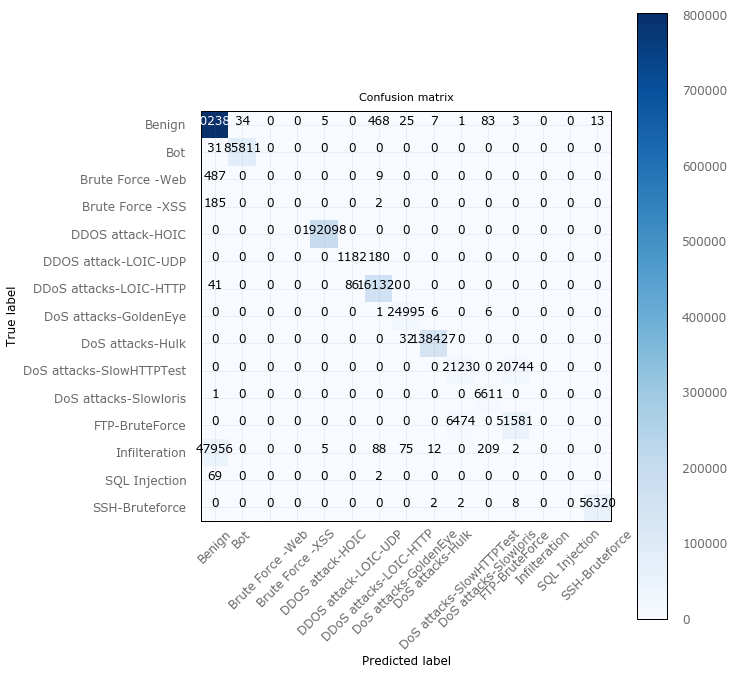

In [30]:
#outcomes = ['DoS', 'normal','Probe' ,'R2L', 'U2R']
class_names=outcomes


results = confusion_matrix(true_lbls, pred_lbls)
# Plot non-normalized confusion matrix
plt.figure(figsize=(10,10))
plot_confusion_matrix(results, classes=class_names,
                      title='Confusion matrix')

#print(classification_report(y_test, deepprediction, target_names=class_names, digits=5))

## Data Test

In [31]:
#Data Test
result_test = dnn.evaluate(test,ylabel_test)
for name, value in zip(dnn.metrics_names, result_test):
    print(name, value)
    
print("%s: %.2f%%" % (dnn.metrics_names[1], result_test[1]*100))

404836/404836 [==============================] - 18s 45us/step
loss 0.5143617739729504
acc 0.9527314764497229
acc: 95.27%


In [32]:
##prediksi data Train
#y_test=y_test.to_numpy()

preds = dnn.predict(test)
pred_lbls = np.argmax(preds, axis=1)
true_lbls = np.argmax(ylabel_test, axis=1)

                          precision    recall  f1-score   support

                  Benign    0.94370   0.99914   0.97063    201238
                     Bot    0.99949   0.99953   0.99951     21479
        Brute Force -Web    0.00000   0.00000   0.00000       115
        Brute Force -XSS    0.00000   0.00000   0.00000        43
        DDOS attack-HOIC    0.99996   1.00000   0.99998     48006
    DDOS attack-LOIC-UDP    0.90909   0.86957   0.88889       368
  DDoS attacks-LOIC-HTTP    0.99485   0.99883   0.99684     40219
   DoS attacks-GoldenEye    0.99399   0.99918   0.99658      6123
        DoS attacks-Hulk    0.99986   0.99968   0.99977     34758
DoS attacks-SlowHTTPTest    0.76610   0.50954   0.61202     10484
   DoS attacks-Slowloris    0.96052   1.00000   0.97986      1630
          FTP-BruteForce    0.71368   0.88721   0.79104     14452
           Infilteration    0.00000   0.00000   0.00000     11892
           SQL Injection    0.00000   0.00000   0.00000        16
         

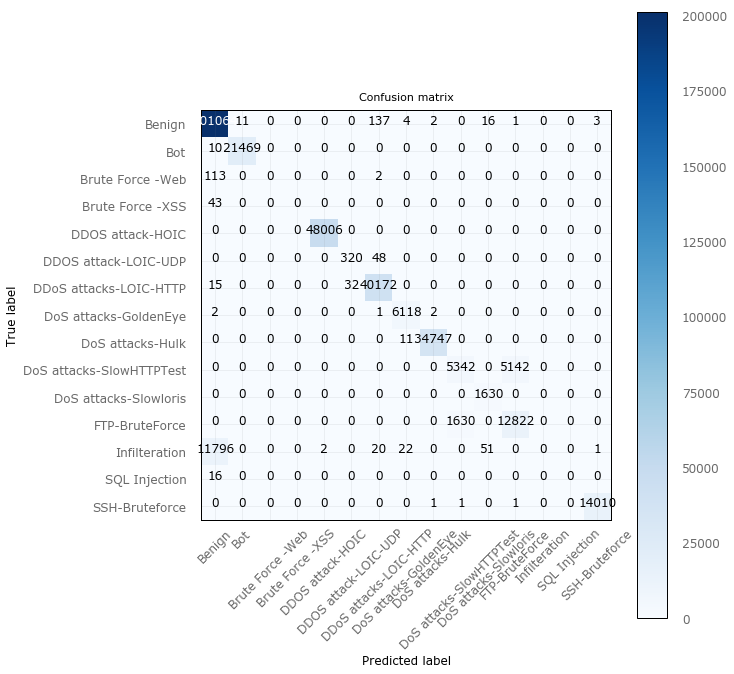

In [33]:
target_names = ["Class {}".format(i) for i in range(15)]
print(classification_report(true_lbls, pred_lbls, target_names=class_names, digits=5))
#print(classification_report(Y_test, y_predict))

results = confusion_matrix(true_lbls, pred_lbls)
# Plot non-normalized confusion matrix
plt.figure(figsize=(10,10))
plot_confusion_matrix(results, classes=class_names,
                      title='Confusion matrix')

#print(classification_report(y_test, deepprediction, target_names=class_names, digits=5))